In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
football = pd.read_csv("results.csv")

In [3]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42483 entries, 0 to 42482
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42483 non-null  object
 1   home_team   42483 non-null  object
 2   away_team   42483 non-null  object
 3   home_score  42483 non-null  int64 
 4   away_score  42483 non-null  int64 
 5   tournament  42483 non-null  object
 6   city        42483 non-null  object
 7   country     42483 non-null  object
 8   neutral     42483 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [5]:
#1) Development over time(games played and goals scored)

In [6]:
football.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [7]:
football["year"] = pd.DatetimeIndex(football["date"]).year

In [8]:
football

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
42478,2021-07-25,Costa Rica,Canada,0,2,Gold Cup,Arlington,United States,True,2021
42479,2021-07-25,United States,Jamaica,1,0,Gold Cup,Arlington,United States,False,2021
42480,2021-07-29,Mexico,Canada,2,1,Gold Cup,Houston,United States,True,2021
42481,2021-07-29,United States,Qatar,1,0,Gold Cup,Austin,United States,False,2021


In [9]:
year = football["year"].value_counts().sort_index()

In [10]:
football.iloc[5]

date          1876-03-25
home_team       Scotland
away_team          Wales
home_score             4
away_score             0
tournament      Friendly
city             Glasgow
country         Scotland
neutral            False
year                1876
Name: 5, dtype: object

In [11]:
football["total_goals"] = football["home_score"] + football["away_score"]

In [12]:
mean = football.groupby("year").mean()

In [13]:
mean

,home_score,away_score,neutral,total_goals
year,,,,
1872,0.000000,0.000000,0.000000,0.000000
1873,4.000000,2.000000,0.000000,6.000000
1874,2.000000,1.000000,0.000000,3.000000
1875,2.000000,2.000000,0.000000,4.000000
1876,3.500000,0.000000,0.000000,3.500000
...,...,...,...,...
2017,1.588727,1.107516,0.268267,2.696242
2018,1.544053,1.064978,0.330396,2.609031
2019,1.699827,1.173010,0.287197,2.872837


Text(0, 0.5, 'dev of games')

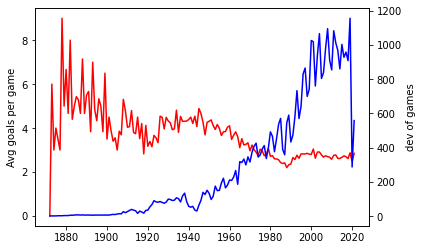

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(mean["total_goals"], color = "red")
ax1.set_ylabel("Avg goals per game")

ax2 = ax1.twinx()
ax2.plot(year, color = "blue")
ax2.set_ylabel("dev of games")

In [15]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


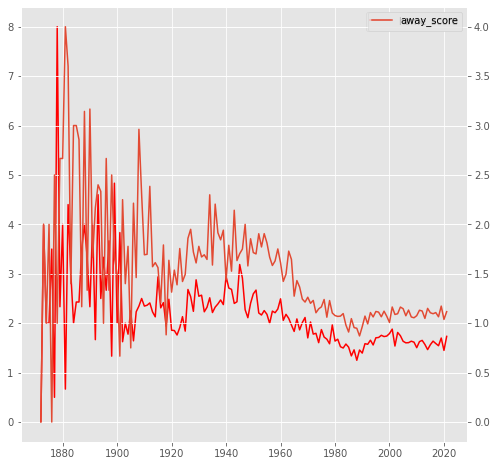

In [33]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(mean["home_score"], color = "red")
plt.legend(["home_score"])
ax1 = ax.twinx()
# this will make both variables 
ax1.plot(mean["away_score"])
plt.legend(["away_score"])

In [17]:
non = football[football["neutral"] == False]
non
#non neutral games

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3
...,...,...,...,...,...,...,...,...,...,...,...
42467,2021-07-18,South Africa,Senegal,0,0,COSAFA Cup,Port Elizabeth,South Africa,False,2021,0
42471,2021-07-18,United States,Canada,1,0,Gold Cup,Kansas City,United States,False,2021,1
42479,2021-07-25,United States,Jamaica,1,0,Gold Cup,Arlington,United States,False,2021,1
42481,2021-07-29,United States,Qatar,1,0,Gold Cup,Austin,United States,False,2021,1


In [18]:
non[["home_score", "away_score"]].describe()

,home_score,away_score
count,31933.000000,31933.000000
mean,1.777284,1.115868
std,1.726891,1.288436
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,31.000000,15.000000


In [19]:
non["outcomes"] = np.where(non["home_score"] > non["away_score"], "Home", np.where(non["home_score"] == non["away_score"], "Draw","Away"))
non

<ipython-input-19-043d78ee9a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non["outcomes"] = np.where(non["home_score"] > non["away_score"], "Home", np.where(non["home_score"] == non["away_score"], "Draw","Away"))


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_goals,outcomes
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,6,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,4,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,Home
...,...,...,...,...,...,...,...,...,...,...,...,...
42467,2021-07-18,South Africa,Senegal,0,0,COSAFA Cup,Port Elizabeth,South Africa,False,2021,0,Draw
42471,2021-07-18,United States,Canada,1,0,Gold Cup,Kansas City,United States,False,2021,1,Home
42479,2021-07-25,United States,Jamaica,1,0,Gold Cup,Arlington,United States,False,2021,1,Home
42481,2021-07-29,United States,Qatar,1,0,Gold Cup,Austin,United States,False,2021,1,Home


In [20]:
#what kind of games were they
tournament = football["tournament"].value_counts().head(5)
tournament

Friendly                                17279
FIFA World Cup qualification             7477
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
Name: tournament, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Friendly'),
  Text(1, 0, 'FIFA World Cup qualification'),
  Text(2, 0, 'UEFA Euro qualification'),
  Text(3, 0, 'African Cup of Nations qualification'),
  Text(4, 0, 'FIFA World Cup')])

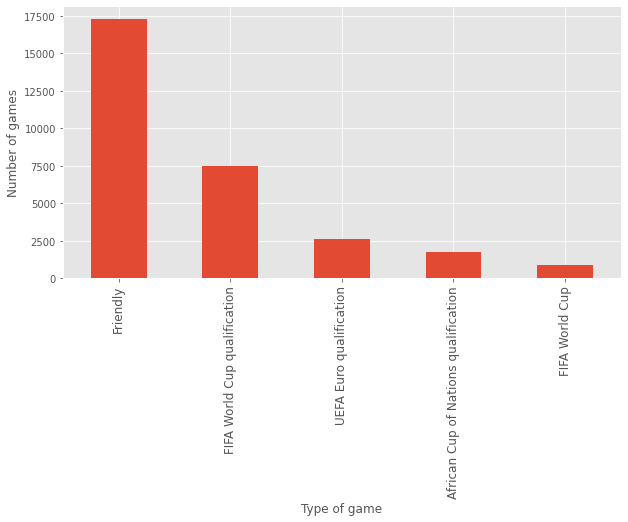

In [21]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax1 = tournament.plot(kind = "bar")
ax1.set_xlabel("Type of game")
ax1.set_ylabel("Number of games")
plt.xticks(fontsize = 12, rotation = 90)

In [22]:
home_goals = football.iloc[non["home_score"].idxmax()]
home_goals

date                             2001-04-11
home_team                         Australia
away_team                    American Samoa
home_score                               31
away_score                                0
tournament     FIFA World Cup qualification
city                          Coffs Harbour
country                           Australia
neutral                               False
year                                   2001
total_goals                              31
Name: 23819, dtype: object

In [23]:
away_goals = football.loc[non["away_score"].idxmin()]
away_goals

date           1872-11-30
home_team        Scotland
away_team         England
home_score              0
away_score              0
tournament       Friendly
city              Glasgow
country          Scotland
neutral             False
year                 1872
total_goals             0
Name: 0, dtype: object

In [24]:
most_goals = football.iloc[football["total_goals"].idxmax()]
most_goals

date                             2001-04-11
home_team                         Australia
away_team                    American Samoa
home_score                               31
away_score                                0
tournament     FIFA World Cup qualification
city                          Coffs Harbour
country                           Australia
neutral                               False
year                                   2001
total_goals                              31
Name: 23819, dtype: object

In [25]:
home = football["home_team"].unique()
home

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [26]:
away = football["away_team"].unique()
away

array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada',
       'Argentina', 'Hungary', 'Czechoslovakia', 'Austria', 'Uruguay',
       'France', 'Switzerland', 'Netherlands', 'Belgium', 'Germany',
       'Norway', 'Sweden', 'Italy', 'Chile', 'Catalonia', 'Finland',
       'Russia', 'Luxembourg', 'Denmark', 'Brazil', 'Basque Country',
       'United States', 'Philippines', 'Estonia', 'Provence',
       'El Salvador', 'Costa Rica', 'Paraguay', 'Yugoslavia', 'Poland',
       'Portugal', 'Spain', 'Romania', 'Australia', 'Central Spain',
       'Mexico', 'Galicia', 'Brittany', 'Asturias', 'China PR',
       'New Zealand', 'Latvia', 'Guatemala', 'Curaçao', 'Bulgaria',
       'Lithuania', 'Turkey', 'Egypt', 'South Africa', 'Jamaica', 'Japan',
       'Republic of Ireland', 'Uganda', 'Bolivia', 'Haiti',
       'Trinidad and Tobago', 'Kenya', 'Ukraine', 'Honduras', 'Nicaragua',
       'Greece', 'Guyana', 'Peru', 'Aruba', 'Martinique', 'Barbados',
       'Cuba', 'Israel', 'Indonesia',

In [27]:
countries = pd.unique(np.concatenate([home,away]))

In [28]:
len(countries)

313

In [29]:
football["winner"] = np.where(football["home_score"] > football["away_score"], football["home_team"], np.where(football["home_score"] == football["away_score"], "Draw",football["away_team"]))

In [30]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_goals,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,6,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,4,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,Scotland


In [31]:
winners = football["winner"].value_counts()
winners

Draw           9790
Brazil          638
England         587
Germany         563
Argentina       534
               ... 
Saarland          1
Raetia            1
Surrey            1
Timor-Leste       1
Gozo              1
Name: winner, Length: 301, dtype: int64

<AxesSubplot:>

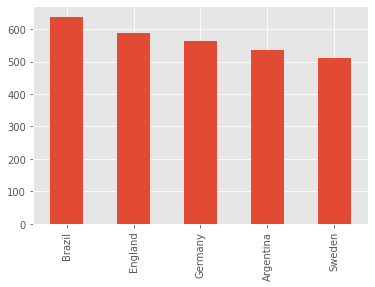

In [32]:
plt.style.use('ggplot')
winners[1:6].plot(kind = "bar")